In [83]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import warnings
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd
warnings.filterwarnings('ignore')
import csv

In [84]:
#Read DGA FILE 
path='C:\\Users\\Dubey\\Desktop\\IIsc_class_2\\E9 205_MLSP\\Project'
os.chdir(path)
df= pd.read_csv("dga_data.csv")
print(df)

       H2  CH4    C2H2    C2H4   C2H6    CO                Fault Type  Label
0    4566  671  683643  434322  45482  2001  High intensity discharge      3
1    2323  782  545454  342233   4343  4545  High intensity discharge      3
2    2118  844  540711  449264   4443  4535  High intensity discharge      3
3    2285  706  546779  435718   4303  4235  High intensity discharge      3
4    2238  826  537988  335279   4008  4472  High intensity discharge      3
..    ...  ...     ...     ...    ...   ...                       ...    ...
195    11   12      25      78     31    32                  No fault      0
196   140    1      79      97     35    24                  No fault      0
197    38   48      29      72     90    31                  No fault      0
198     0   44      68      73     22     7                  No fault      0
199     3    3      89      37     40  2481                  No fault      0

[200 rows x 8 columns]


In [85]:
#Preprocessing of data 
#data=df.drop(['CO','Fault Type'], axis = 1)
x=df.iloc[:,[0, 1, 2, 3, 4,5]]
#print(x)
x=(x-x.mean())/x.std()
#print(x)
y=df['Label'].tolist()
x= x.to_numpy()
print(type(x),x.shape)
print(len(y))

<class 'numpy.ndarray'> (200, 6)
200


In [105]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.77, test_size=0.23, random_state=101)
#X_val, X_test, y_val, y_test = model_selection.train_test_split(x, y, train_size=0.55, test_size=0.45, random_state=101)

In [106]:
#Modfied evolution partical swarm optimization 
def pso(X_train, y_train,n_particles,iterations,inertia):
    #Range of SVC Hyperparameter (Particles search space)
    #C, epsilon and gamma
    max_c=1.7
    min_c=1e-3
    max_g=1
    min_g=1e-3
    
    #Initialize particles positions randomly inside the search space
    x=np.random.rand(n_particles,1)*(max_c-min_c)+min_c
    y=np.random.rand(n_particles,1)*(max_g-min_g)+min_g
    
    c=np.concatenate((x,y),axis=1)
    
    #Initialize particles parameter 
    v=np.zeros((n_particles,2))
    #Initial and fianl social coffient 
    ci1=1
    ci2=1
    cf1=2
    cf2=2
    p_best=np.zeros((n_particles,2))   
    g_best=np.zeros((1,2))
    p_best_Val=np.zeros((n_particles,1))+sys.maxsize  #for fitness function
    g_best_Val=sys.maxsize
    
    best_iter=np.zeros(iterations)
    
    #Initialize classification variables 
    p_best_cls=np.empty((n_particles),dtype=object)
    g_best_cls=sys.maxsize
    

    from sklearn.metrics import mean_squared_error
    
    #learning parameter 
    tau1=np.random.random()
    tau2=np.random.random()
    
    for i in range(iterations):
        W=[]  #W contains coeff to update velocity of particles 
        for j in range(n_particles):
            rbf = svm.SVC(kernel='rbf',C=c[j][0], gamma=c[j][1])
            rbf.fit(X_train, y_train)
            rbf_pred = rbf.predict(X_train)
            
            #Mean square error
            mse=mean_squared_error(y_train,rbf_pred)
            #print('mse=',mse)
            if(mse < p_best_Val[j]):
                
                p_best_Val[j]=mse
                p_best_cls[j]=rbf
                
                p_best[j]=c[j].copy()
                
            aux=np.argmin(p_best_Val)    

            if(p_best_Val[aux] < g_best_Val):
                g_best_Val=p_best_Val[aux] 
                g_best=p_best[aux].copy()
                g_best_cls=p_best_cls[aux]

            
            N=np.exp(-np.random.random())
    
            #define inertia
            w=inertia
            W.append(w+(N*tau2))
            
            c1=ci1+(i*(cf1-ci1)/iterations)
            W.append(c1+(N*tau2))
            
            c2=ci2+(i*(cf2-ci2)/iterations)
            W.append(c2+(N*tau2))
            
            c3=c1*(1-np.exp(-i*c2))
            W.append(c3+(N*tau2))
            
            g_best_m=np.add(g_best,[tau1*N,tau1*N])
         
            #velocity
            v[j]=W[0]*v[j]+W[1]*(p_best[j]-c[j])+W[2]*(g_best_m-c[j])+W[3]*(c[np.random.randint(0,n_particles)]-c[j])
            
            #change in particles position 
            c[j]=c[j]+v[j]
            
            #Bound the particles
            if (c[j][0]>max_c):
                c[j][0]=max_c
            if (c[j][0]<min_c):
                c[j][0]=min_c
                
            if (c[j][1]>max_g):
                c[j][1]=max_g
            if (c[j][1]<min_g):
                c[j][1]=min_g    

                
                
        best_iter[i]=g_best_Val 
        print('Iter {}>>g_best_Val={}'.format(i,g_best_Val))
            
    print('g_best',g_best)
    print('g_best_cls',g_best_cls)
    
    t=range(iterations)
    plt.plot(t,best_iter,label='Fitness value')
    plt.legend()
    plt.show()
    return(g_best_cls)

Iter 0>>g_best_Val=[0.07792208]
Iter 1>>g_best_Val=[0.05194805]
Iter 2>>g_best_Val=[0.05194805]
Iter 3>>g_best_Val=[0.05194805]
Iter 4>>g_best_Val=[0.05194805]
Iter 5>>g_best_Val=[0.05194805]
Iter 6>>g_best_Val=[0.05194805]
Iter 7>>g_best_Val=[0.05194805]
Iter 8>>g_best_Val=[0.05194805]
Iter 9>>g_best_Val=[0.05194805]
g_best [1.1647351  0.23764614]
g_best_cls SVC(C=1.1647351028621444, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.23764613802342321,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


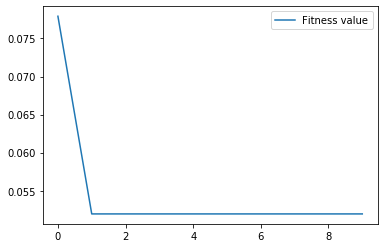

In [107]:
g_best_cls=pso(X_train, y_train,20,10,1)

In [108]:
rbf_pred = g_best_cls.predict(X_test)
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  97.83
F1 (RBF Kernel):  97.89
